# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

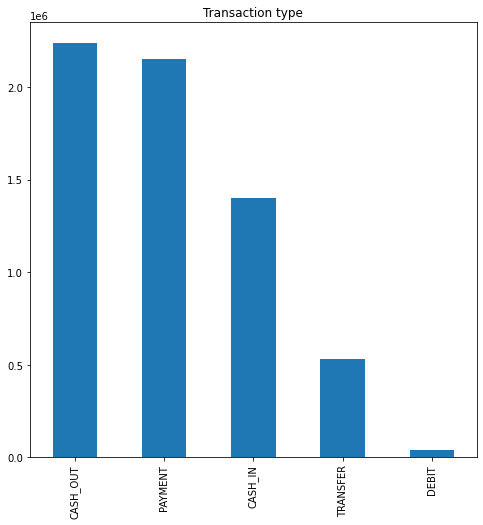

In [6]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

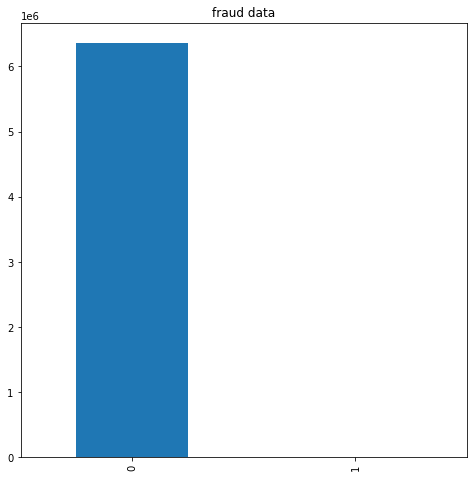

In [8]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\Administrateur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

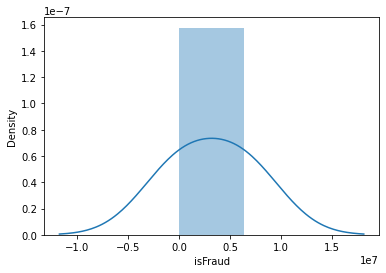

In [10]:
sns.distplot(data.isFraud.value_counts())


In [11]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [ ]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [ ]:
# Your response here
#the distribution is right skewed

In [12]:
pd.crosstab(data.isFraud, data.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


<AxesSubplot:xlabel='isFraud', ylabel='Count'>

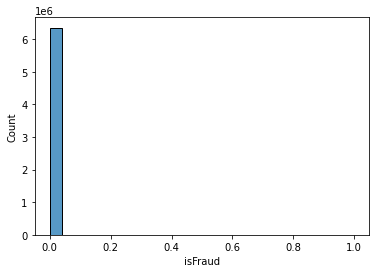

In [13]:
sns.histplot(data.isFraud)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [14]:
# High corr between new and old balances so we drop new ones
data.drop(['newbalanceOrig', 'newbalanceDest'], axis = 1, inplace = True)
data

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,M1979787155,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,M2044282225,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,C38997010,21182.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,M1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,C776919290,0.00,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,C1881841831,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,C1365125890,68488.84,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,C2080388513,0.00,1,0


In [15]:
data.select_dtypes(include='object').nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [16]:
# too many different values for those two columns
data.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)
data.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,21182.0,1,0
4,1,PAYMENT,11668.14,41554.0,0.0,0,0


In [18]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x=data_dummies.drop(['isFraud'], axis=1)
y=data_dummies.isFraud
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

LR = LogisticRegression()
LR.fit(x_train,y_train)
prediction_l=LR.predict(x_test)
print("The accuracy of the Logistic Regression is","{:.3f}".format(metrics.accuracy_score(prediction_l,y_test)))

The accuracy of the Logistic Regression is 0.999


C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classification report for LogisticRegression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.00      0.00      0.00      1641

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



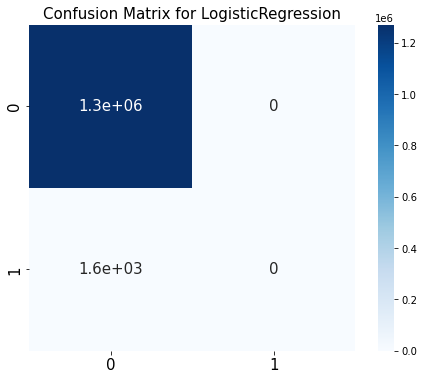

In [24]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

generate_results(LR, prediction_l, 'LogisticRegression')

Confusion matrix on TRAIN


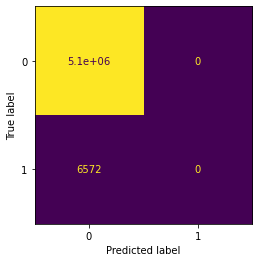

In [26]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, LR.predict(x_train), colorbar=False)

Confusion matrix on TEST


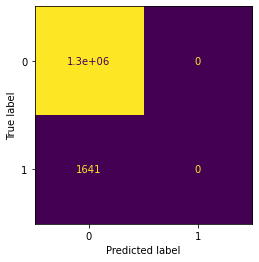

In [27]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, LR.predict(x_test), colorbar=False)

### Now pick a model of your choice and evaluate its accuracy.

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(x_train, y_train)
prediction=dtc.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.999


Confusion matrix on TRAIN


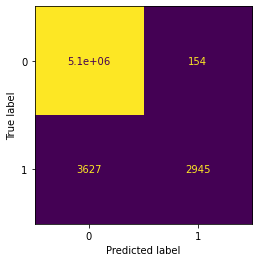

In [32]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, dtc.predict(x_train), colorbar=False)

Confusion matrix on TEST


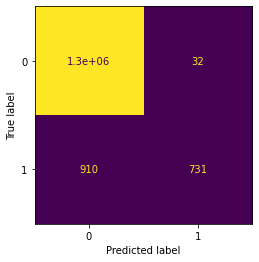

In [33]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(x_test), colorbar=False)

### Which model worked better and how do you know?

In [2]:
# Your response here


### Let's use NearMiss method for undersampling and compare the results with previous

In [40]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss 

print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
x_train_res, y_train_res = nm.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 6572, 1: 6572})


In [42]:
dtc.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


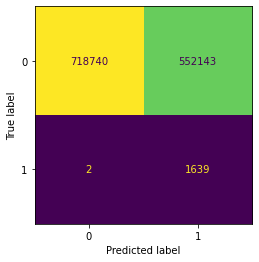

In [43]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(x_test), colorbar=False)

### And now let's apply SMOTE

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
x_train_res_sm, y_train_res_sm = sm.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_sm))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 5083524, 1: 5083524})


### Apply your model on improved data

In [45]:
dtc.fit(x_train_res_sm, y_train_res_sm)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


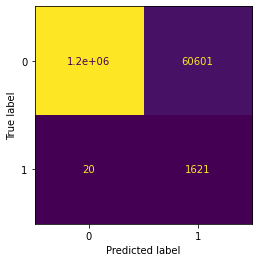

In [46]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(x_test), colorbar=False)

### Calculate classification report for imbalanced data to evaluate the models

In [47]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, dtc.predict(x_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.95      0.99      0.98      0.97      0.94   1270883
          1       0.03      0.99      0.95      0.05      0.97      0.94      1641

avg / total       1.00      0.95      0.99      0.97      0.97      0.94   1272524



### What is your conclusion?